 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns and sort by ascending
whale_returns_csv = Path("./Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_returns_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
whale_df = whale_df.sort_index(ascending=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns and sort by ascending
algo_returns_csv = Path("./Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_returns_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
algo_df = algo_df.sort_index(ascending=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices and sort by ascending
sp500_history_csv = Path("./Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_history_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)

#Sorting the S&P 500 causes the answer to not match with the examples given in the starter code document
sp500_df = sp500_df.sort_index(ascending=True)

sp500_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [9]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types and remove dollar signs
sp500_df["Close"] = sp500_df["Close"].str.replace("$","").astype(float)
sp500_df.dtypes

Close    float64
dtype: object

In [11]:
# Calculate Daily Returns using `pct_change` function
sp500_df["Close"] = sp500_df["Close"].pct_change()
sp500_df.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [12]:
# Drop nulls
sp500_df.dropna(inplace=True)
sp500_df.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [13]:
# Rename Column
sp500_df.rename(columns={"Close": "S&P 500"}, inplace=True)
sp500_df.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Concatenate all DataFrames into a single DataFrame
group_df = pd.concat([whale_df, algo_df, sp500_df], axis=1 , join="inner")
group_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

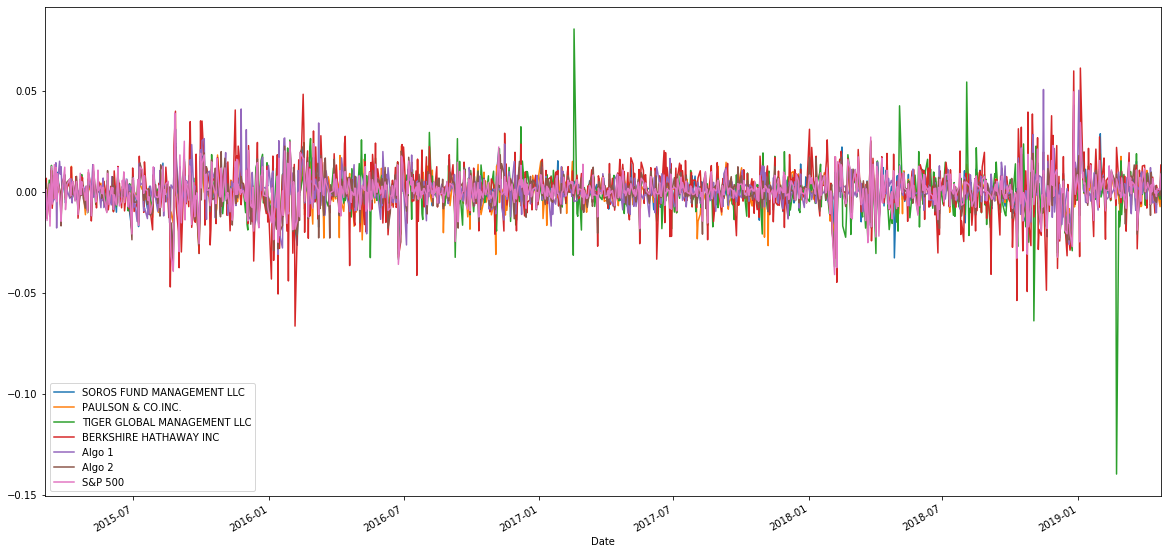

In [15]:
group_df.plot(figsize=(20,10))

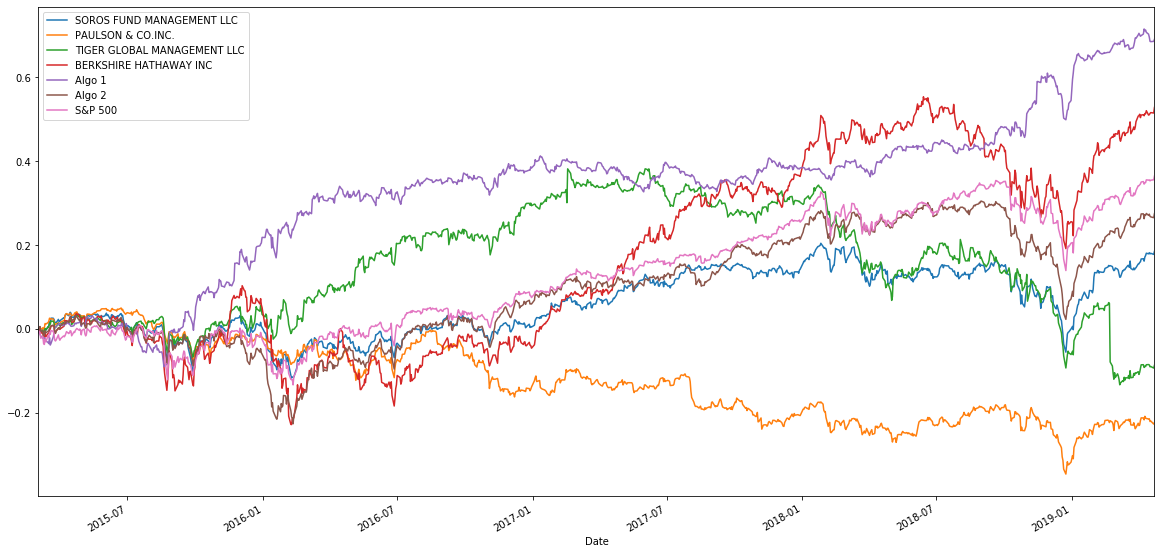

In [16]:
# Plot cumulative returns

cumulative_returns = group_df.cumsum()
cumulative_returns.plot(figsize=(20,10))

## Cumulative Return Results

Both the **Berkshire Hathaway Portfolio** and the **Algo 1 Portfolio** out perform the **S&P 500**

---

## Performance by Month and Year
### (Optional)

Analyze the performance by Month and Year:

1. Calculate the Annual Returns
2. Sort the 2017 portfolio returns in descending order to determine the best portfolios for 2017
3. Calculate the Monthly Returns
4. Sort in descending order, the porfolio returns for December 2018

In [17]:
# Returns by Year
yearly_returns =group_df.groupby([group_df.index.year]).sum()
yearly_returns.index.names = ["Year"]
yearly_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Year,,,,,,,
2015,0.003612,-0.020215,0.034808,0.050841,0.218207,-0.060092,-0.024871
2016,0.001008,-0.118263,0.258866,-0.096697,0.165273,0.119528,0.099646
2017,0.137685,-0.067871,0.007946,0.409339,0.000170,0.154322,0.179757
2018,-0.142244,-0.110971,-0.362566,-0.107804,0.160558,-0.142150,-0.049921
2019,0.184829,0.094183,-0.025705,0.272108,0.146038,0.203195,0.159717


In [18]:
# Top Portfolio returns for 2017
yearly_returns.loc[2017].sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.409339
S&P 500                        0.179757
Algo 2                         0.154322
SOROS FUND MANAGEMENT LLC      0.137685
TIGER GLOBAL MANAGEMENT LLC    0.007946
Algo 1                         0.000170
PAULSON & CO.INC.             -0.067871
Name: 2017, dtype: float64

In [19]:
# Returns by Month

# End of Month Returns
last_of_month_ret = cumulative_returns.groupby([cumulative_returns.index.year, cumulative_returns.index.month]).last()

# Calculate the monthly returns
monthly_returns = last_of_month_ret / last_of_month_ret.shift() - 1

monthly_returns.index.names = ["Year", "Month"]
monthly_returns.head()


#group_df_month = group_df.groupby([group_df.index.year,group_df.index.month]).sum()
#group_df_month.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Year Month                                                  
2015 3                            NaN                 NaN   
     4                       0.197048            1.478587   
     5                       0.397937            0.692522   
     6                      -0.690923           -0.236958   
     7                      -1.595430           -0.497826   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Year Month                                                                  
2015 3                              NaN                     NaN       NaN   
     4                         1.073926                4.339378 -0.528889   
     5                        -0.059818                0.090811  1.539612   
     6                        -1.197813               -1.205411 -0.190300   
     7                        -5.374798                6.227871 -4.038149   

               Algo 2   S&P 500  
Year Month                       
2015 3            NaN       NaN  
     4     -20.181519 -0.384530  
     5       0.127104 -0.774856  
     6      -0.900691  6.550420  
     7     -15.407440 -0.843367

In [20]:
# Top Portfolio Returns for December 2018
#
group_df_dec = group_df.groupby([group_df.index.year,group_df.index.month]).sum()
group_df_dec.loc[2018,12].sort_values(ascending=False)

Algo 1                        -0.055459
BERKSHIRE HATHAWAY INC        -0.089051
S&P 500                       -0.092875
PAULSON & CO.INC.             -0.094337
SOROS FUND MANAGEMENT LLC     -0.097989
Algo 2                        -0.124434
TIGER GLOBAL MANAGEMENT LLC   -0.152859
Name: (2018, 12), dtype: float64

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

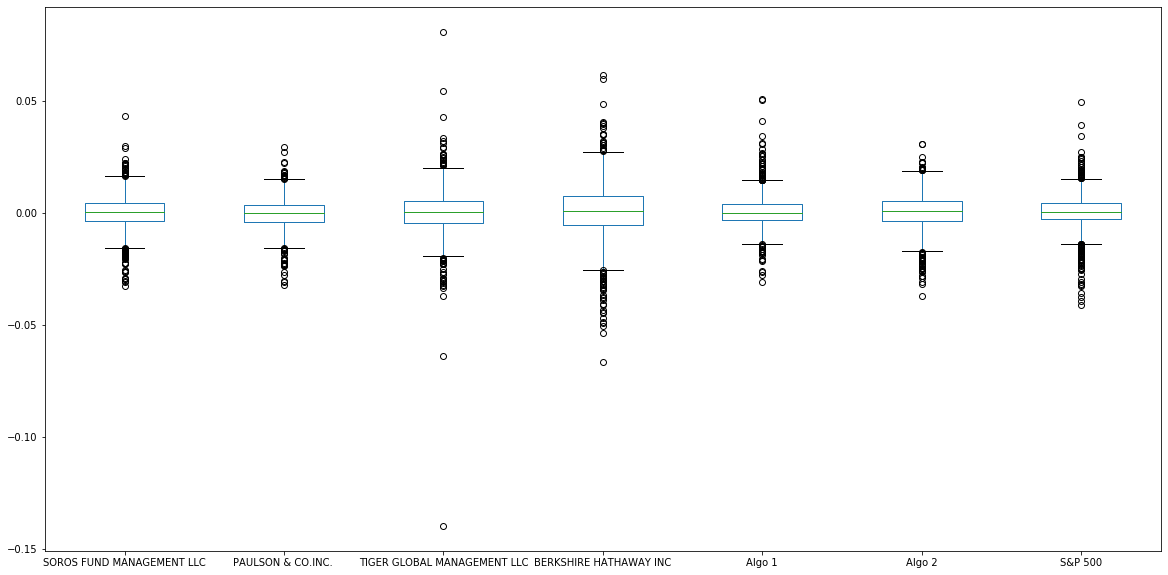

In [21]:
# Box plot to visually show risk
group_df.plot.box(figsize=(20,10))

**Berkshire Hathaway Inc** has the largest spread & **Algo 1** has the smallest spread

In [22]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
group_df_std = group_df.std()
group_df_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

In [23]:
# Determine which portfolios are riskier than the S&P 500
group_df_std > group_df_std["S&P 500"]

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

## Risk Results
Both the **Berkshire Hathaway Portfolio** and the **Tiger Global Managment Portfolio** are risker than the **S&P 500**

In [24]:
# Calculate the annualized standard deviation (252 trading days)
group_df_ann_std = group_df.std() * np.sqrt(252)
group_df_ann_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calcualte the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

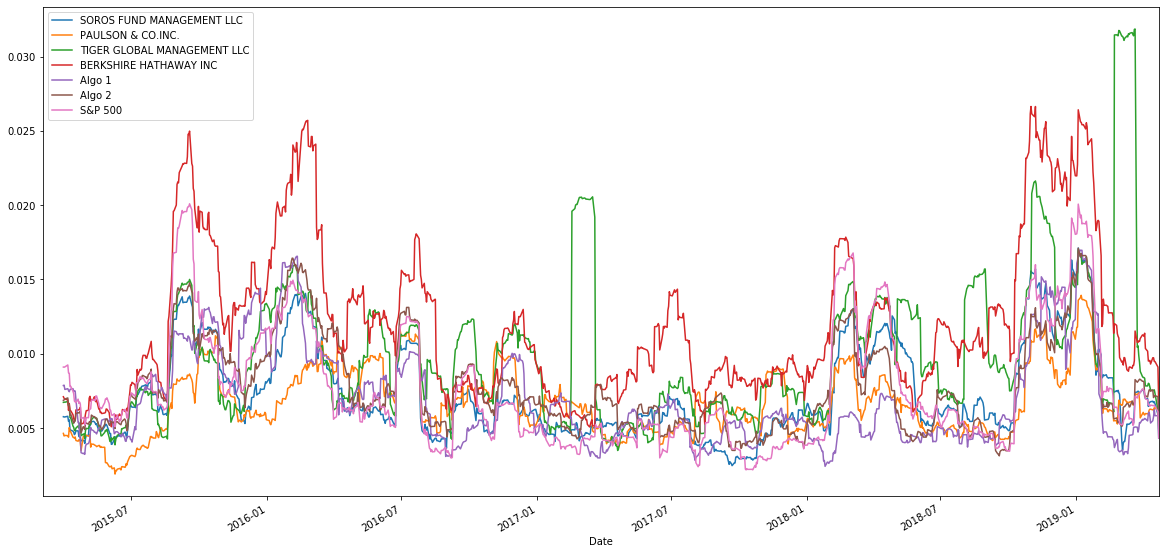

In [25]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
group_rolling = group_df.rolling(window=21).std().plot(figsize=(20,10))
group_rolling

**Berkshire Hathaway** and **Tiger Global Mgt** both experience periods of elevated risk outside of the market changes.

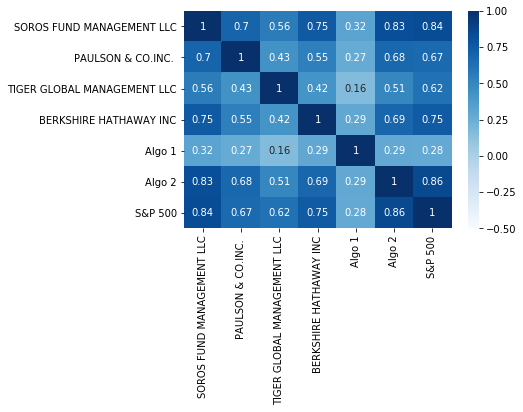

In [26]:
# Correlation
correlation = group_df.corr()
sns.heatmap(correlation, vmin=-0.5, vmax=1, annot=True, cmap="Blues")

## Correlation Results
The **Soros Fund Management Portfolio** and the **Algo 2 Portfolio** are most closely correlated to the **S&P 500**

In [27]:
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


AxesSubplot(0.125,0.2;0.775x0.68)


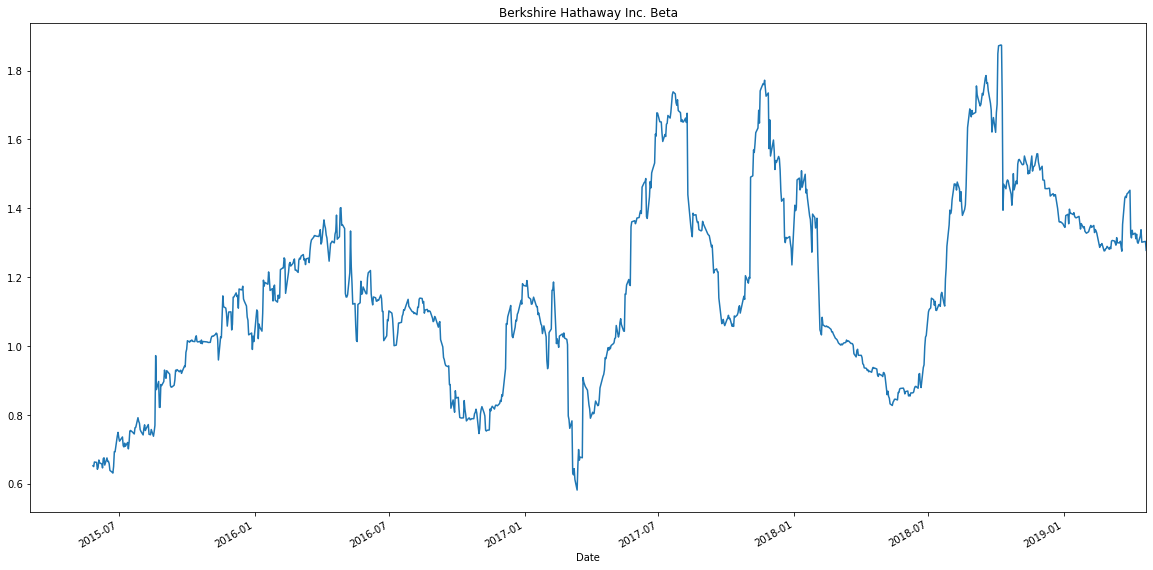

In [28]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
#covariance = group_df["BERKSHIRE HATHAWAY INC"].cov(group_df["S&P 500"])
#variance = group_df["S&P 500"].var()
#berk_beta = covariance / variance
rolling_berk_covariance = group_df["BERKSHIRE HATHAWAY INC"].rolling(window=60).cov(group_df['S&P 500'])
rolling_variance = group_df["S&P 500"].rolling(window=60).var()
rolling_berk_beta = rolling_berk_covariance / rolling_variance
rolling_beta_plot = rolling_berk_beta.plot(figsize=(20, 10), title="Berkshire Hathaway Inc. Beta")
print(rolling_beta_plot)

## Rolling Beta Results
The **Berkshire Hathaway Portfolio** has a rolling beta that sits well above 1.0 most time indicating it is much more volitile than the market.

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

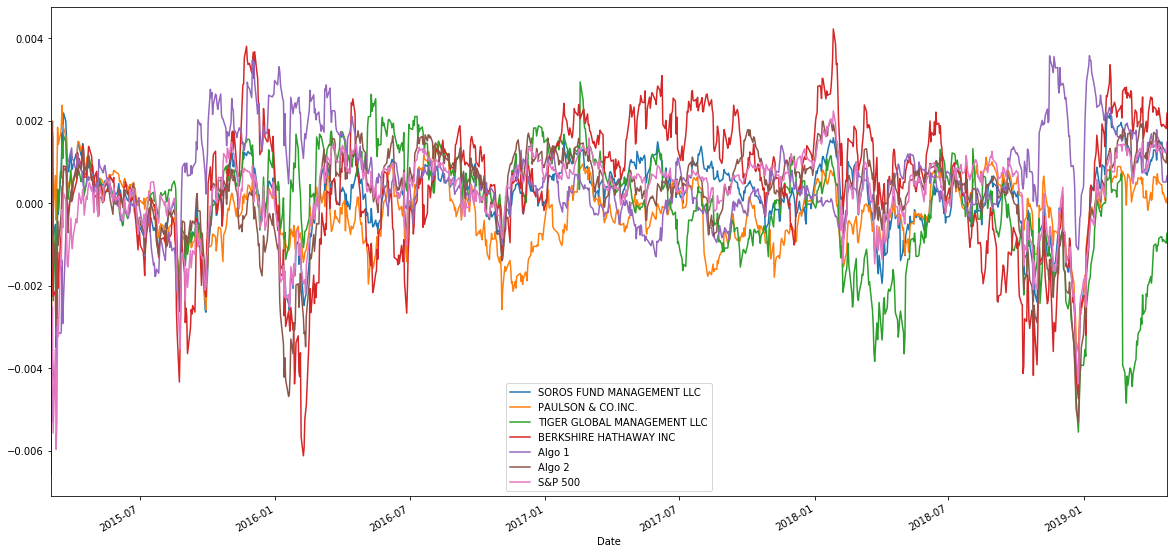

In [29]:
group_ewa = group_df.ewm(halflife=21).mean().plot(figsize=(20,10))
group_ewa

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [30]:
# Annualzied Sharpe Ratios
group_df_sr = (group_df.mean() * 252) / (group_df.std() * np.sqrt(252))
group_df_sr

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

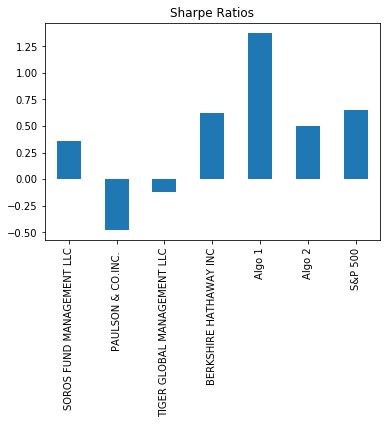

In [31]:
# Visualize the sharpe ratios as a bar plot
group_df_sr.plot(kind="bar", title="Sharpe Ratios")

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [32]:
# Read the first stock
chk_csv = Path("./Resources/chk_5yr.csv")
chk_df = pd.read_csv(chk_csv, index_col='date', parse_dates=True, infer_datetime_format=True).sort_index(ascending=True)
chk_df = chk_df["close"]
chk_df.head()

date
2014-08-12    25.86
2014-08-13    25.75
2014-08-14    25.65
2014-08-15    25.55
2014-08-18    25.46
Name: close, dtype: float64

In [33]:
# Read the second stock
aks_csv = Path("./Resources/aks_5yr.csv")
aks_df = pd.read_csv(aks_csv, index_col='date', parse_dates=True, infer_datetime_format=True).sort_index(ascending=True)
aks_df = aks_df["close"]
aks_df.head()

date
2014-08-12     9.58
2014-08-13     9.80
2014-08-14     9.75
2014-08-15     9.59
2014-08-18    10.36
Name: close, dtype: float64

In [34]:
# Read the third stock
cenx_csv = Path("./Resources/cenx_5yr.csv")
cenx_df = pd.read_csv(cenx_csv, index_col='date', parse_dates=True, infer_datetime_format=True).sort_index(ascending=True)
cenx_df = cenx_df["close"]
cenx_df.head()

date
2014-08-12    21.50
2014-08-13    21.53
2014-08-14    21.13
2014-08-15    21.14
2014-08-18    21.60
Name: close, dtype: float64

In [35]:
# Read the fouth stock
amd_csv = Path("./Resources/amd_5yr.csv")
amd_df = pd.read_csv(amd_csv, index_col='date', parse_dates=True, infer_datetime_format=True).sort_index(ascending=True)
amd_df = amd_df["close"]
amd_df.head()

date
2014-08-18    4.21
2014-08-19    4.27
2014-08-20    4.28
2014-08-21    4.24
2014-08-22    4.25
Name: close, dtype: float64

In [36]:
# Read the fifth stock
ng_csv = Path("./Resources/ng_5yr.csv")
ng_df = pd.read_csv(ng_csv, index_col='date', parse_dates=True, infer_datetime_format=True).sort_index(ascending=True)
ng_df = ng_df["close"]
ng_df.head()

date
2014-08-18    3.79
2014-08-19    3.77
2014-08-20    3.76
2014-08-21    3.62
2014-08-22    3.69
Name: close, dtype: float64

In [37]:
# Concatenate all stocks into a single DataFrame
pers_group_df = pd.concat([chk_df, aks_df, cenx_df, amd_df, ng_df], axis=1, join="inner")
pers_group_df.head()

,close,close,close,close,close
date,,,,,
2014-08-18,25.46,10.36,21.60,4.21,3.79
2014-08-19,26.15,10.40,21.56,4.27,3.77
2014-08-20,26.33,10.22,22.53,4.28,3.76
2014-08-21,26.46,10.01,22.22,4.24,3.62
2014-08-22,26.02,10.68,22.58,4.25,3.69


In [38]:
# Reset the index
pers_group_df.reset_index()
pers_group_df.head()

,close,close,close,close,close
date,,,,,
2014-08-18,25.46,10.36,21.60,4.21,3.79
2014-08-19,26.15,10.40,21.56,4.27,3.77
2014-08-20,26.33,10.22,22.53,4.28,3.76
2014-08-21,26.46,10.01,22.22,4.24,3.62
2014-08-22,26.02,10.68,22.58,4.25,3.69


In [39]:
# Pivot the Data so that the stock tickers are the columns, the dates are the index, and the 
# values are the closing prices
pers_group_df.columns = ["CHK", "AKS", "CENX", "AMD", "NG"]



In [40]:
# Drop Nulls
pers_group_df = pers_group_df.pct_change()
pers_group_df.dropna(inplace=True)
pers_group_df.head()

,CHK,AKS,CENX,AMD,NG
date,,,,,
2014-08-19,0.027101,0.003861,-0.001852,0.014252,-0.005277
2014-08-20,0.006883,-0.017308,0.044991,0.002342,-0.002653
2014-08-21,0.004937,-0.020548,-0.013759,-0.009346,-0.037234
2014-08-22,-0.016629,0.066933,0.016202,0.002358,0.019337
2014-08-25,0.027671,0.012172,0.031444,-0.016471,-0.021680


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [41]:
# Calculate weighted portfolio returns
weights = [1/5, 1/5, 1/5, 1/5, 1/5]
pers_group_df_returns = pers_group_df.dot(weights)
pers_group_df_returns.head()                                     

date
2014-08-19    0.007617
2014-08-20    0.006851
2014-08-21   -0.015190
2014-08-22    0.017640
2014-08-25    0.006627
dtype: float64

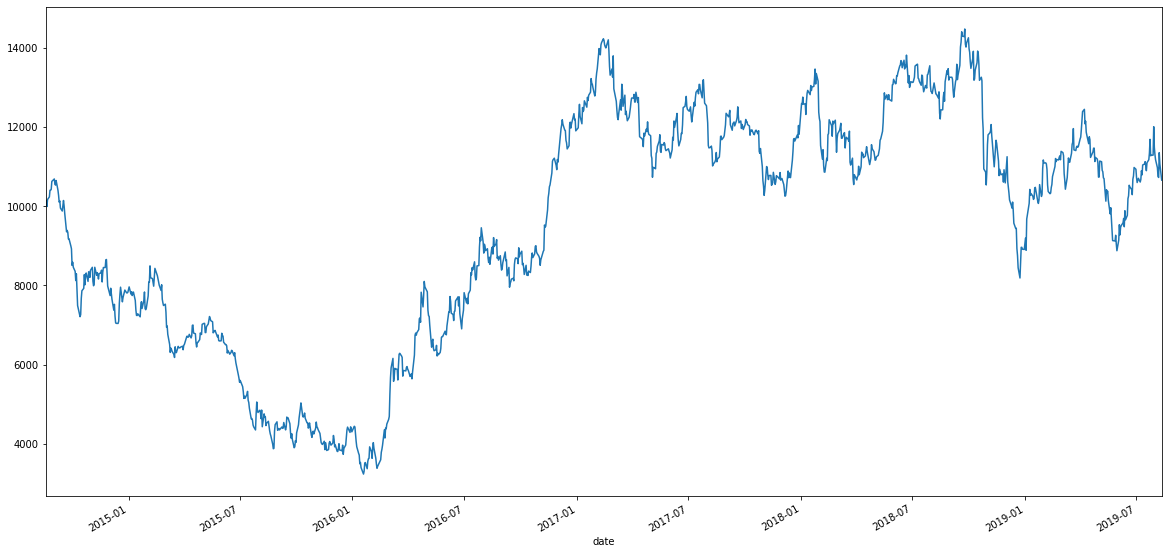

In [42]:
initial_investment = 10000
pers_group_cumulative_returns = (1 + pers_group_df_returns).cumprod()
pers_group_cumulative_profits = (initial_investment * pers_group_cumulative_returns)
pers_group_cumulative_profits.plot(figsize=(20,10))

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [43]:
joint_portfolio = pd.concat([group_df, pers_group_df_returns], axis="columns", join="inner").rename(columns = {0:'Cathro'})
joint_portfolio.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Cathro
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,-0.026907
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,-0.052152
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,0.004862
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,-0.030405
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,-0.037320


In [44]:
# Only compare dates where the new, custom portfolio has dates
joint_portfolio.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P 500                        0
Cathro                         0
dtype: int64

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [45]:
# Risk
volatility = joint_portfolio.std() * np.sqrt(252)
volatility

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
Cathro                         0.409489
dtype: float64

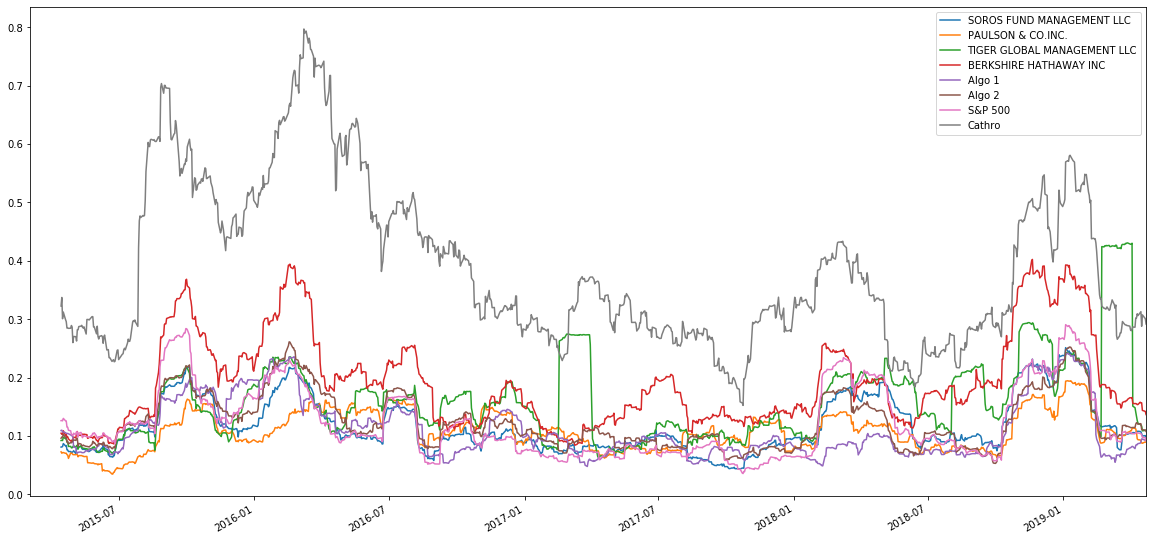

In [46]:
# Rolling
joint_portfolio_rolloing_risk = joint_portfolio.rolling(window=30).std() * np.sqrt(252)
joint_portfolio_rolloing_risk.plot(figsize=(20,10))

1.5924730085537842
AxesSubplot(0.125,0.2;0.775x0.68)


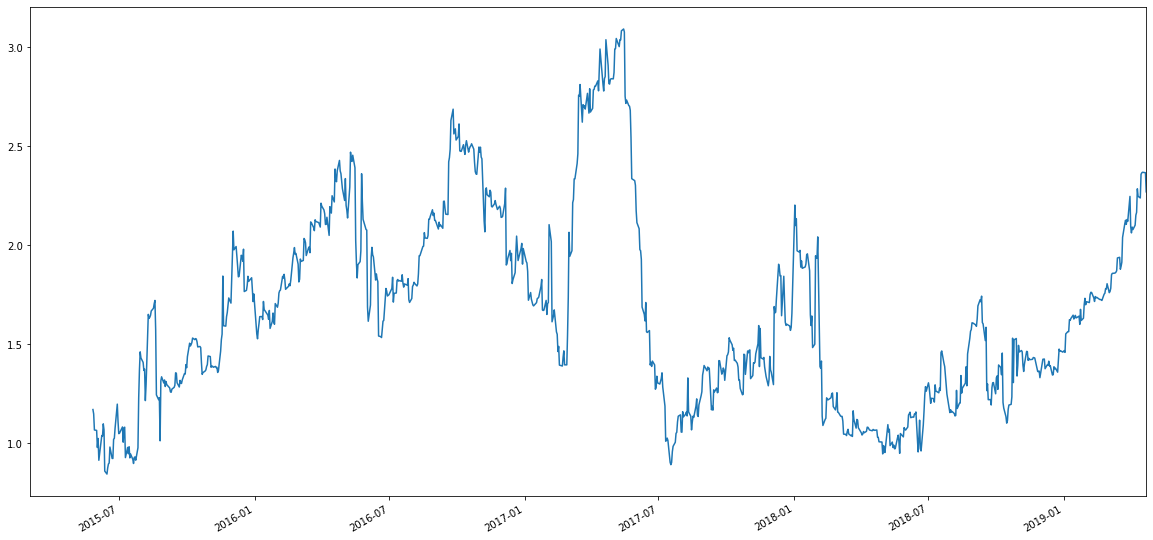

In [47]:
# Beta
covariance = joint_portfolio["Cathro"].cov(joint_portfolio["S&P 500"])
variance = joint_portfolio["S&P 500"].var()
cathro_beta = covariance / variance
print(cathro_beta)
rolling_cathro_covariance = joint_portfolio["Cathro"].rolling(window=60).cov(joint_portfolio['S&P 500'])
rolling_variance = joint_portfolio["S&P 500"].rolling(window=60).var()
rolling_cathro_beta = rolling_cathro_covariance / rolling_variance
rolling_beta_plot = rolling_cathro_beta.plot(figsize=(20, 10))
print(rolling_beta_plot)

In [48]:
# Annualzied Sharpe Ratios
joint_portfolio_sr = (joint_portfolio.mean() * 252) / (joint_portfolio.std() * np.sqrt(252))
joint_portfolio_sr

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
Cathro                         0.451968
dtype: float64

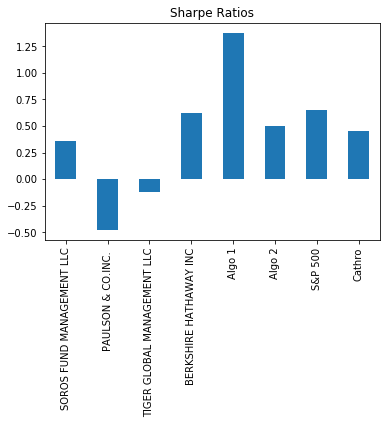

In [49]:
# Visualize the sharpe ratios as a bar plot
joint_portfolio_sr.plot(kind="bar", title="Sharpe Ratios")

## Include correlation analysis to determine which stocks (if any) are correlated

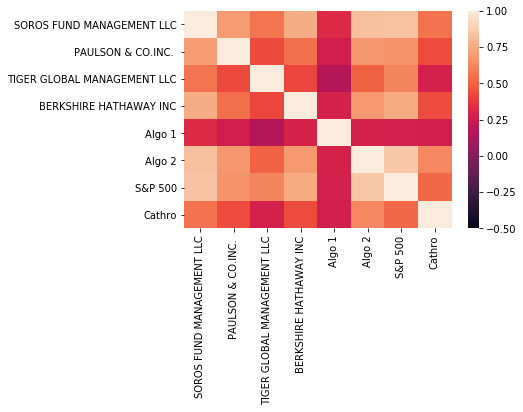

In [50]:
# YOUR CODE HERE
joint_correlation = joint_portfolio.corr()
sns.heatmap(joint_correlation, vmin=-0.5, vmax=1)

In [51]:
joint_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Cathro
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864,0.556935
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732,0.437905
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946,0.286526
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371,0.439136
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494,0.278307
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764,0.629215
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000,0.528063
Cathro,0.556935,0.437905,0.286526,0.439136,0.278307,0.629215,0.528063,1.000000


## Cathro Portfolio Results
The **Cathro Portfolio** is a highly volatile portfolio with a moderatly high sharpe ratio, and it underperforms comparted to the market standard of the **S&P 500**.